In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 1 - Sin Camisa

In [2]:
n=8
dl=0.025/n
x0=0.4
y0=0.3
nx=int(np.rint(1+x0/(dl)))
ny=int(np.rint(1+y0/(dl)))
x=np.linspace(0,x0,nx)
y=np.linspace(0,y0,ny)
xx,yy=np.meshgrid(x,y)
Mx=np.array([xx,yy])

In [3]:
h=500.0
k=2.0
wp=50000
T1=20.0
c1=-wp*dl*dl/k
c2=h*dl/k

In [4]:
Vsol=np.zeros(nx*ny)
mat=np.zeros((nx*ny,nx*ny))
ge=np.zeros((ny,nx))

In [5]:
ge[0,:]=1
ge[ny-1,:]=2
ge[:,0]=3
ge[:,nx-1]=4
ge[(xx>=0.125)&(xx<=0.35)&(yy>=0.05)&(yy<=0.175)]=5
ge[0,0]=6
ge[ny-1,0]=7
ge[0,nx-1]=8
ge[ny-1,nx-1]=9

In [6]:
for i in range(nx):
    for j in range(ny):
        ind=j*nx+i
        if(ge[j,i]==0):
            mat[ind,ind]=-4
            mat[ind,ind-1]=mat[ind,ind+1]=mat[ind,ind+nx]=mat[ind,ind-nx]=1
        elif(ge[j,i]==5):
            mat[ind,ind]=-4
            mat[ind,ind-1]=mat[ind,ind+1]=mat[ind,ind+nx]=mat[ind,ind-nx]=1
            Vsol[ind]=c1
        elif(ge[j,i]==1):
            mat[ind,ind]=-4
            mat[ind,ind-1]=mat[ind,ind+1]=1
            mat[ind,ind+nx]=2
        elif(ge[j,i]==3):
            mat[ind,ind]=-4
            mat[ind,ind-nx]=mat[ind,ind+nx]=1
            mat[ind,ind+1]=2
        elif(ge[j,i]==4):
            mat[ind,ind]=-4
            mat[ind,ind-nx]=mat[ind,ind+nx]=1
            mat[ind,ind-1]=2
        elif(ge[j,i]==2):
            mat[ind,ind]=-2*(c2+2)
            mat[ind,ind-1]=mat[ind,ind+1]=1
            mat[ind,ind-nx]=2
            Vsol[ind]=-2*c2*T1
        elif(ge[j,i]==6):
            mat[ind,ind]=-2
            mat[ind,ind+1]=mat[ind,ind+nx]=1
        elif(ge[j,i]==8):
            mat[ind,ind]=-2
            mat[ind,ind-1]=mat[ind,ind+nx]=1
        elif(ge[j,i]==7):
            mat[ind,ind]=-2*(c2+1)
            mat[ind,ind+1]=mat[ind,ind-nx]=1
            Vsol[ind]=-2*c2*T1
        elif(ge[j,i]==9):
            mat[ind,ind]=-2*(c2+1)
            mat[ind,ind-1]=mat[ind,ind-nx]=1
            Vsol[ind]=-2*c2*T1

In [7]:
T=np.linalg.solve(mat,Vsol)
Tm = T.reshape((ny, nx))
print(np.min(Tm),np.max(Tm))

24.118513297118835 395.5259472221393


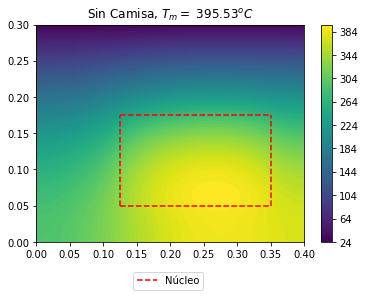

In [8]:
plt.contourf(xx, yy, Tm, 100)
plt.plot([0.125,0.35],[0.05,0.05],"--",c="r")
plt.plot([0.125,0.35],[0.175,0.175],"--",c="r")
plt.plot([0.125,0.125],[0.05,0.175],"--",c="r")
plt.plot([0.35,0.35],[0.05,0.175],"--",c="r",label="Núcleo")
plt.title(f"Sin Camisa, $T_m=$ {np.max(Tm):.2f}$^o C $")
plt.legend(loc=(0.36,-0.22))
plt.colorbar();
plt.savefig("sinCamisa",bbox_inches="tight")

# Punto 2 - Con Camisa

In [9]:
n=8
dl=0.025/n
x0=0.4
y0=0.3
nx=int(np.rint(1+x0/(dl)))
ny=int(np.rint(1+y0/(dl)))
x=np.linspace(0,x0,nx)
y=np.linspace(0,y0,ny)
xx,yy=np.meshgrid(x,y)
Mx=np.array([xx,yy])

In [10]:
h=500.0
k=2.0
h2=1000.0
wp=50000.0
T1=20.0
T2=50.0
c1=-wp*dl*dl/k
c2=h*dl/k
c22=h2*dl/k

In [11]:
Vsol=np.zeros(nx*ny)
mat=np.zeros((nx*ny,nx*ny))
ge=np.zeros((ny,nx))

In [12]:
ge[0,:]=1
ge[ny-1,:]=2
ge[:,0]=3
ge[:,nx-1]=4
ge[(xx>=0.125)&(xx<=0.35)&(yy>=0.05)&(yy<=0.175)]=5
ge[0,0]=6
ge[ny-1,0]=7
ge[0,nx-1]=8
ge[ny-1,nx-1]=9
ge[(xx>=0.05)&(xx<=0.075)&(yy==0.05)]=10
ge[(xx>=0.075)&(xx<=0.325)&(yy==0.225)]=10
ge[(xx>=0.05)&(xx<=0.325)&(yy==0.25)]=11
ge[(xx==0.075)&(yy>=0.05)&(yy<=0.225)]=12
ge[(xx==0.325)&(yy>=0.225)&(yy<=0.25)]=12
ge[(xx==0.05)&(yy>=0.05)&(yy<=0.25)]=13
ge[(xx==0.075)&(yy==0.05)]=14
ge[(xx==0.325)&(yy==0.225)]=14
ge[(xx==0.05)&(yy==0.05)]=15
ge[(xx==0.05)&(yy==0.25)]=16
ge[(xx==0.325)&(yy==0.25)]=17
ge[(xx==0.075)&(yy==0.225)]=18
ge[(xx>0.05)&(xx<0.075)&(yy>0.05)&(yy<0.025)]=19
ge[(xx>0.05)&(xx<0.325)&(yy>0.225)&(yy<0.25)]=19

In [13]:
for i in range(nx):
    for j in range(ny):
        ind=j*nx+i
        if(ge[j,i]==0):
            mat[ind,ind]=-4
            mat[ind,ind-1]=mat[ind,ind+1]=mat[ind,ind+nx]=mat[ind,ind-nx]=1
        elif(ge[j,i]==5):
            mat[ind,ind]=-4
            mat[ind,ind-1]=mat[ind,ind+1]=mat[ind,ind+nx]=mat[ind,ind-nx]=1
            Vsol[ind]=c1
        elif(ge[j,i]==1):
            mat[ind,ind]=-4
            mat[ind,ind-1]=mat[ind,ind+1]=1
            mat[ind,ind+nx]=2
        elif(ge[j,i]==3):
            mat[ind,ind]=-4
            mat[ind,ind-nx]=mat[ind,ind+nx]=1
            mat[ind,ind+1]=2
        elif(ge[j,i]==4):
            mat[ind,ind]=-4
            mat[ind,ind-nx]=mat[ind,ind+nx]=1
            mat[ind,ind-1]=2
        elif(ge[j,i]==2):
            mat[ind,ind]=-2*(c2+2)
            mat[ind,ind-1]=mat[ind,ind+1]=1
            mat[ind,ind-nx]=2
            Vsol[ind]=-2*c2*T1
        elif(ge[j,i]==6):
            mat[ind,ind]=-2
            mat[ind,ind+1]=mat[ind,ind+nx]=1
        elif(ge[j,i]==8):
            mat[ind,ind]=-2
            mat[ind,ind-1]=mat[ind,ind+nx]=1
        elif(ge[j,i]==7):
            mat[ind,ind]=-2*(c2+1)
            mat[ind,ind+1]=mat[ind,ind-nx]=1
            Vsol[ind]=-2*c2*T1
        elif(ge[j,i]==9):
            mat[ind,ind]=-2*(c2+1)
            mat[ind,ind-1]=mat[ind,ind-nx]=1
            Vsol[ind]=-2*c2*T1
        elif(ge[j,i]==10):
            mat[ind,ind]=-2*(c22+2)
            mat[ind,ind-1]=mat[ind,ind+1]=1
            mat[ind,ind-nx]=2
            Vsol[ind]=-2*c22*T2
        elif(ge[j,i]==11):
            mat[ind,ind]=-2*(c22+2)
            mat[ind,ind-1]=mat[ind,ind+1]=1
            mat[ind,ind+nx]=2
            Vsol[ind]=-2*c22*T2
        elif(ge[j,i]==12):
            mat[ind,ind]=-2*(c22+2)
            mat[ind,ind-nx]=mat[ind,ind+nx]=1
            mat[ind,ind+1]=2
            Vsol[ind]=-2*c22*T2
        elif(ge[j,i]==13):
            mat[ind,ind]=-2*(c22+2)
            mat[ind,ind-nx]=mat[ind,ind+nx]=1
            mat[ind,ind-1]=2
            Vsol[ind]=-2*c22*T2
        elif(ge[j,i]==14):
            mat[ind,ind]=-2*(c22+3)
            mat[ind,ind-nx]=mat[ind,ind+1]=2
            mat[ind,ind+nx]=mat[ind,ind-1]=1
            Vsol[ind]=-2*c22*T2
        elif(ge[j,i]==15):
            mat[ind,ind]=-2*(c22+3)
            mat[ind,ind-nx]=mat[ind,ind-1]=2
            mat[ind,ind+nx]=mat[ind,ind+1]=1
            Vsol[ind]=-2*c22*T2
        elif(ge[j,i]==16):
            mat[ind,ind]=-2*(c22+3)
            mat[ind,ind+nx]=mat[ind,ind-1]=2
            mat[ind,ind-nx]=mat[ind,ind+1]=1
            Vsol[ind]=-2*c22*T2
        elif(ge[j,i]==17):
            mat[ind,ind]=-2*(c22+3)
            mat[ind,ind+nx]=mat[ind,ind+1]=2
            mat[ind,ind-nx]=mat[ind,ind-1]=1
            Vsol[ind]=-2*c22*T2
        elif(ge[j,i]==18):
            mat[ind,ind]=-2*(c22+1)
            mat[ind,ind-nx]=mat[ind,ind+1]=1
            Vsol[ind]=-2*c22*T2
        elif(ge[j,i]==19):
            mat[ind,ind]=1
            Vsol[ind]=T2

In [14]:
T=np.linalg.solve(mat,Vsol)
Tm = T.reshape((ny, nx))
print(np.min(Tm),np.max(Tm))

21.15354954242867 264.35377173440423


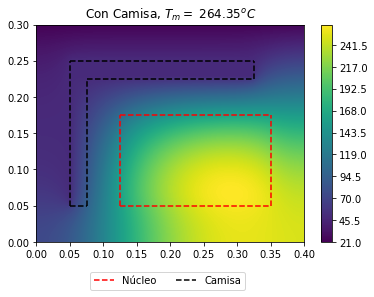

In [15]:
plt.contourf(xx, yy, Tm, 1000)
plt.plot([0.125,0.35],[0.05,0.05],"--",c="r")
plt.plot([0.125,0.35],[0.175,0.175],"--",c="r")
plt.plot([0.125,0.125],[0.05,0.175],"--",c="r",label="Núcleo")
plt.plot([0.35,0.35],[0.05,0.175],"--",c="r")
plt.plot([0.05,0.075],[0.05,0.05],"--",c="k")
plt.plot([0.075,0.325],[0.225,0.225],"--",c="k")
plt.plot([0.05,0.325],[0.25,0.25],"--",c="k")
plt.plot([0.05,0.05],[0.05,0.25],"--",c="k")
plt.plot([0.075,0.075],[0.05,0.225],"--",c="k")
plt.plot([0.325,0.325],[0.225,0.25],"--",c="k",label="Camisa")
plt.title(f"Con Camisa, $T_m=$ {np.max(Tm):.2f}$^o C $")
plt.legend(loc=(0.2,-0.22),ncol=2)
plt.colorbar();
plt.savefig("conCamisa",bbox_inches="tight")